<a href="https://colab.research.google.com/github/collinscolour/GoMyCodeCheckPoint/blob/main/supervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this checkpoint, you are going to work on the '5G-Energy consumption' dataset that was provided by the international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

The competition is taking place from 2023-07-05 to 2023-09-30. Fore more information click here.

Checkpoint problematic : Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.

Dataset description : This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

➡️ Dataset link




Instructions
Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features

Select your target variable and the features

Split your dataset to training and test sets

Based on your data exploration phase select a ML regression algorithm and train it on the training set

Assess your model performance on the test set using relevant evaluation metrics
Discuss with your cohort alternative ways to improve your model performance

In [ ]:
!pip install plotly

In [ ]:
!pip install ydata_profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=80fbb4e6314ce57b039ba78d5d0d262e924a49d57a6a69e5aae3ed7180a203f5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
#import csv file
df = pd.read_csv('5G_energy_consumption_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [ ]:
# Clean the data
# Check for missing values
df.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

In [ ]:

# Check for duplicate rows
df.duplicated().sum()

# Remove missing values
df.dropna(inplace=True)


# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.9+ MB


In [ ]:
#remove outliers using zscore
new_df= df[(np.abs(stats.zscore(df["Energy"])) <3)]



In [ ]:
#encoding categorical features using LabelEncoder
categorical_features = new_df.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
  encoder = LabelEncoder()
  new_df[feature] = encoder.fit_transform(new_df[feature])

<ipython-input-35-fcf9a2a775b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[feature] = encoder.fit_transform(new_df[feature])
<ipython-input-35-fcf9a2a775b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[feature] = encoder.fit_transform(new_df[feature])


In [ ]:

# Save the cleaned data to a new CSV file
new_df.to_csv('cleaned_data.csv', index=False)

print(new_df)

                  Time      BS     Energy      load  ESMODE   TXpower
0      20230101 010000     B_0  64.275037  0.487936     0.0  7.101719
1      20230101 020000     B_0  55.904335  0.344468     0.0  7.101719
2      20230101 030000     B_0  57.698057  0.193766     0.0  7.101719
3      20230101 040000     B_0  55.156951  0.222383     0.0  7.101719
4      20230101 050000     B_0  56.053812  0.175436     0.0  7.101719
...                ...     ...        ...       ...     ...       ...
92624  20230102 170000  B_1018  14.648729  0.087538     0.0  7.325859
92625  20230102 180000  B_1018  14.648729  0.082635     0.0  7.325859
92626  20230102 210000  B_1018  13.452915  0.055538     0.0  7.325859
92627  20230102 220000  B_1018  13.602392  0.058077     0.0  7.325859
92628  20230102 230000  B_1018  13.303438  0.048173     0.0  7.325859

[92629 rows x 6 columns]


In [ ]:
new_df.describe()

,Time,BS,Energy,load,ESMODE,TXpower
count,91825.000000,91825.000000,91825.000000,91825.000000,91825.000000,91825.000000
mean,71.516243,424.206382,27.702039,0.241388,0.082071,6.762849
std,44.328587,243.729678,13.169615,0.232215,0.383912,0.309837
min,0.000000,0.000000,0.747384,0.000000,0.000000,5.381166
25%,34.000000,213.000000,18.236173,0.056670,0.000000,6.427504
50%,67.000000,423.000000,23.916293,0.163050,0.000000,6.875934
75%,109.000000,630.000000,35.127055,0.357300,0.000000,6.875934
max,167.000000,922.000000,69.805680,0.993957,4.000000,8.375336


In [ ]:
X=new_df["load"].values[:,np.newaxis]
Y=new_df["Energy"].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=30) #splitting data with test size of 35%
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 102.97114999052442
R squared 0.4044060849877805


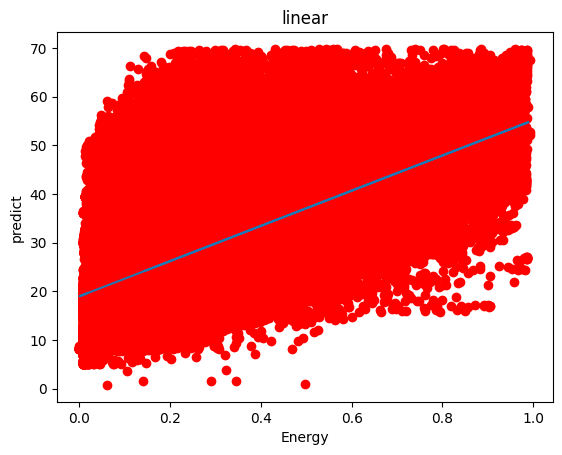

In [52]:
plt.scatter(X,Y,color='r')
plt.title('linear')
plt.xlabel('Energy')
plt.ylabel('predict')
plt.plot(x_test,model.predict(x_test))
plt.show()